# Analysis of the condition media experiments
---

## 0. Environmental setup

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC
from scipy.stats import pearsonr

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn import mixture
import itertools

---
## 1. Read in data

### 1.1. gH2AX - 02/25/21

In [6]:
root_dir = "../data/sample1/tcells_features_04_13_21/"

dapi_gh2ax_lamin_02_25_21_features_2d = pd.read_csv(root_dir+"dapi_gh2ax_lamin_02_25_21_features_2d.csv", index_col=0)
dapi_gh2ax_lamin_02_25_21_features_3d = pd.read_csv(root_dir+"dapi_gh2ax_lamin_02_25_21_features_3d.csv", index_col=0)
dapi_gh2ax_lamin_02_25_21_features_3d.index = dapi_gh2ax_lamin_02_25_21_features_2d.index
dapi_gh2ax_lamin_02_25_21_features = dapi_gh2ax_lamin_02_25_21_features_2d.join(dapi_gh2ax_lamin_02_25_21_features_3d, rsuffix="_3d")
dapi_gh2ax_lamin_02_25_21_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,median_lamina_int,kurtosis_lamina_int,skewness_lamina_int,normalized_mean_lamina_int,normalized_std_lamina_int,normalized_q25_lamina_int,normalized_q75_lamina_int,normalized_median_lamina_int,normalized_kurtosis_lamina_int,normalized_skewness_lamina_int
DAPI_Lamin_gH2AX_12bit_500Zstep_1_0,0.022714,0.074956,68,0.153825,0.068655,0.067891,0.035763,9.955047,145,0.220481,...,31.0,7.174363,2.412937,1.035865,0.649184,0.000000,0.475662,0.921596,7.174365,2.412938
DAPI_Lamin_gH2AX_12bit_500Zstep_1_1,0.029694,0.036822,41,0.128911,0.051858,0.040807,0.022980,6.015540,116,0.058785,...,17.0,175.003790,7.336865,0.952003,0.693990,0.000000,0.655186,0.856782,175.003716,7.336864
DAPI_Lamin_gH2AX_12bit_500Zstep_1_2,0.026996,0.036939,43,0.112288,0.049467,0.042471,0.022499,6.034969,122,0.066281,...,31.0,369.432369,11.945353,0.853013,0.661961,0.000000,0.480790,0.709738,369.432528,11.945356
DAPI_Lamin_gH2AX_12bit_500Zstep_1_3,0.028671,0.034926,51,0.102207,0.046874,0.037563,0.020296,6.187412,132,0.089717,...,78.0,88.556088,6.080292,0.864002,0.728145,0.023428,0.429521,0.609139,88.556090,6.080292
DAPI_Lamin_gH2AX_12bit_500Zstep_1_4,0.027932,0.033798,60,0.098052,0.047023,0.037563,0.023100,5.877884,125,0.067891,...,33.0,21.986244,3.171427,0.971595,0.704267,0.000000,0.500071,0.785826,21.986241,3.171426


### 1.2. HP1 - 02/25/21

In [7]:
dapi_hp1_lamin_02_25_21_features_2d = pd.read_csv(root_dir+"dapi_hp1_lamin_02_25_21_features_2d.csv", index_col=0)
dapi_hp1_lamin_02_25_21_features_3d = pd.read_csv(root_dir+"dapi_hp1_lamin_02_25_21_features_3d.csv", index_col=0)
dapi_hp1_lamin_02_25_21_features_3d.index = dapi_hp1_lamin_02_25_21_features_2d.index
dapi_hp1_lamin_02_25_21_features = dapi_hp1_lamin_02_25_21_features_2d.join(dapi_hp1_lamin_02_25_21_features_3d, rsuffix="_3d")
dapi_hp1_lamin_02_25_21_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,median_lamina_int,kurtosis_lamina_int,skewness_lamina_int,normalized_mean_lamina_int,normalized_std_lamina_int,normalized_q25_lamina_int,normalized_q75_lamina_int,normalized_median_lamina_int,normalized_kurtosis_lamina_int,normalized_skewness_lamina_int
Tcells_DAPI_Lamin_HP1_1_0,0.027963,0.035846,56,0.102207,0.048837,0.039185,0.020368,6.153439,126,0.098052,...,171.0,8.136731,2.680209,0.976771,0.879109,0.019390,0.438213,0.663137,8.136731,2.680209
Tcells_DAPI_Lamin_HP1_1_1,0.026112,0.046726,59,0.127626,0.057000,0.058785,0.024064,7.125061,125,0.125562,...,68.0,121.797181,5.915739,0.991155,0.734455,0.000000,0.352114,0.772378,121.797225,5.915740
Tcells_DAPI_Lamin_HP1_1_2,0.028937,0.037276,52,0.127626,0.049837,0.040807,0.023851,6.129906,123,0.079597,...,177.0,7.655181,2.600058,1.059532,0.858378,0.018101,0.438949,0.800969,7.655181,2.600058
Tcells_DAPI_Lamin_HP1_1_3,0.025792,0.038999,64,0.112288,0.050895,0.047379,0.021397,6.514605,128,0.079597,...,253.0,9.254029,2.832703,1.084114,0.808875,0.013719,0.332680,0.867711,9.254027,2.832702
Tcells_DAPI_Lamin_HP1_1_4,0.030219,0.059248,113,0.220481,0.061732,0.050076,0.037256,13.334201,216,0.198763,...,136.0,110.398725,9.079540,0.431281,0.569509,0.007879,0.153643,0.267890,110.398747,9.079542


----

### 1.3 HP1 - 03/26/21

In [9]:
dapi_hp1_lamin_03_26_21_features_2d = pd.read_csv(root_dir+"dapi_hp1_lamin_03_26_21_features_2d.csv", index_col=0)
dapi_hp1_lamin_03_26_21_features_3d = pd.read_csv(root_dir+"dapi_hp1_lamin_03_26_21_features_3d.csv", index_col=0)
dapi_hp1_lamin_03_26_21_features_3d.index = dapi_hp1_lamin_03_26_21_features_2d.index
dapi_hp1_lamin_03_26_21_features = dapi_hp1_lamin_03_26_21_features_2d.join(dapi_hp1_lamin_03_26_21_features_3d, rsuffix="_3d")
dapi_hp1_lamin_03_26_21_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,median_lamina_int,kurtosis_lamina_int,skewness_lamina_int,normalized_mean_lamina_int,normalized_std_lamina_int,normalized_q25_lamina_int,normalized_q75_lamina_int,normalized_median_lamina_int,normalized_kurtosis_lamina_int,normalized_skewness_lamina_int
1_0,0.024830,0.035810,70,0.121212,0.045434,0.037563,0.020572,6.451673,142,0.098052,...,59.0,10.734873,2.917373,1.144297,0.794429,0.0,0.366539,0.940253,10.734874,2.917373
1_1,0.026286,0.040047,64,0.157067,0.046884,0.037563,0.026317,6.376159,136,0.119406,...,46.0,10.345797,2.918853,1.051557,0.857383,0.0,0.379278,0.793037,10.345796,2.918853
1_2,0.026976,0.051666,58,0.128911,0.057274,0.054669,0.027475,7.216510,126,0.153764,...,59.0,10.743682,2.796474,1.099916,0.842393,0.0,0.403305,0.881297,10.743682,2.796474
1_3,0.025429,0.048518,67,0.112288,0.054609,0.047379,0.023833,7.044573,129,0.173950,...,9.0,1094.218155,26.549970,0.477881,0.487118,0.0,0.207123,0.372821,1094.218082,26.549969
1_4,0.024833,0.033081,98,0.103945,0.045230,0.037563,0.020469,6.151331,136,0.067891,...,22.0,36.570850,4.191452,0.923074,0.828649,0.0,0.368196,0.675026,36.570854,4.191453


### 1.4 All data

In [10]:
all_data = dapi_gh2ax_lamin_02_25_21_features.append(dapi_hp1_lamin_02_25_21_features).append(dapi_hp1_lamin_03_26_21_features)
all_data.describe()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,median_lamina_int,kurtosis_lamina_int,skewness_lamina_int,normalized_mean_lamina_int,normalized_std_lamina_int,normalized_q25_lamina_int,normalized_q75_lamina_int,normalized_median_lamina_int,normalized_kurtosis_lamina_int,normalized_skewness_lamina_int
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,0.025993,0.040739,64.876136,0.124976,0.050696,0.044090,0.023692,6.641385,131.443182,0.097549,...,107.984091,249.558229,8.221688,0.834627,0.773199,0.002875,0.303667,0.612721,249.558216,8.221688
std,0.002131,0.009625,14.035527,0.036459,0.005969,0.007776,0.005530,0.991989,16.017523,0.048281,...,136.138910,539.094511,9.176296,0.245683,0.151059,0.006065,0.104129,0.213407,539.094464,9.176296
min,0.012677,0.020750,31.000000,0.075943,0.038068,0.031546,0.014298,5.459730,101.000000,0.033706,...,4.000000,4.712298,2.149992,0.086777,0.145103,0.000000,0.029060,0.029060,4.712298,2.149992
25%,0.024853,0.034158,56.000000,0.103945,0.046117,0.037563,0.020242,6.101900,125.000000,0.067891,...,25.000000,10.851832,3.000432,0.736403,0.710654,0.000000,0.245154,0.503437,10.851831,3.000432
50%,0.026101,0.039306,63.000000,0.116547,0.050094,0.040807,0.022827,6.455840,130.000000,0.089717,...,63.000000,18.505221,3.517538,0.915368,0.790086,0.000000,0.313288,0.653522,18.505217,3.517539
75%,0.027425,0.045287,72.000000,0.128911,0.053954,0.047379,0.025674,6.902498,136.000000,0.116547,...,136.250000,199.933704,9.083117,1.003871,0.857774,0.000000,0.372531,0.765779,199.933714,9.083118
max,0.031637,0.090725,203.000000,0.414214,0.075217,0.071429,0.058362,17.621803,370.000000,0.387426,...,1099.000000,4032.482604,52.875871,1.241455,1.491194,0.030413,0.655186,1.094214,4032.482569,52.875862


---

## 2. Data preprocessing

We will now preprocess the data for the downstream analyses.

### 2.1. Remove constant and NA samples

In [25]:
# Remove constant features for control data
cleaned_all_data = all_data.loc[:, (all_data != all_data.iloc[0]).any()]
cleaned_all_data = cleaned_all_data.dropna(axis=1, how='all')
# Remove rows with missing entries in the control data
cleaned_all_data = cleaned_all_data.dropna(axis=0)
print("{} rows and {} columns were dropped for the control data.".format(str(len(all_data)-len(cleaned_all_data)), str(len(all_data.columns)-len(cleaned_all_data.columns))))

16 rows and 8 columns were dropped for the control data.


### 2.2. Remove highly correlated features


In [26]:
# Maintain features that have at most a Pearson correlation of 0.75
threshold = 0.70

# Control data
all_data_corr_matrix = cleaned_all_data.corr().abs()
upper = all_data_corr_matrix.where(np.triu(np.ones(all_data_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)] + ["label"] +["bbox-1"]
len(to_drop)

214

We drop 214 of the features that show a high autocorrelation (larger than 0.7) plus 2 that are artifacts from the segmentation.

In [27]:
cleaned_all_data = cleaned_all_data.drop(to_drop, axis=1)
cleaned_all_data.describe()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Len_posi_Curvature,num_prominant_positive_curvature,width_prominant_positive_curvature,num_prominant_negative_curvature,width_prominant_negative_curvature,Min_Calliper,Min_Radius,...,nuclear_mean_int,rdp_1,q25_dapi_int,normalized_std_dapi_int,rel_lamina_int,min_lamina_int,max_lamina_int,kurtosis_lamina_int,normalized_std_lamina_int,normalized_q75_lamina_int
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,...,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.025967,0.040977,64.791667,131.347222,5.486111,8.551098,4.427083,7.429481,65.736111,29.450559,...,1123.560641,0.009425,15.769387,0.471740,145.256740,3.302083,1332.212963,250.488644,0.772218,0.303992
std,0.002118,0.009542,13.972847,16.127312,1.953644,2.169281,1.989371,2.429835,5.998825,4.060977,...,242.021500,0.010115,7.555453,0.050734,173.580832,14.946105,1043.188459,542.245331,0.151880,0.104348
min,0.012677,0.024161,31.000000,101.000000,1.000000,5.150085,1.000000,5.024104,48.000000,2.316889,...,514.818064,0.000015,0.000000,0.286643,5.851943,0.000000,64.000000,4.712298,0.145103,0.029060
25%,0.024852,0.034426,56.000000,124.750000,4.000000,7.173842,3.000000,6.286814,61.750000,27.254385,...,952.651748,0.002629,10.000000,0.436195,36.723732,0.000000,600.000000,10.818476,0.709428,0.245374
50%,0.026090,0.039507,63.000000,130.000000,5.000000,8.179157,4.000000,7.100844,66.000000,29.831746,...,1124.300680,0.006246,17.000000,0.470566,91.947382,0.000000,1000.000000,18.564766,0.788930,0.313699
75%,0.027390,0.045551,72.000000,136.000000,7.000000,9.462073,6.000000,8.050267,69.000000,31.897371,...,1285.131268,0.012309,22.000000,0.503948,185.254841,0.000000,1697.000000,199.933704,0.857181,0.372697
max,0.031637,0.090725,203.000000,370.000000,14.000000,25.493064,11.000000,61.461665,104.000000,40.934539,...,2158.495180,0.060679,43.000000,0.663834,1460.246738,203.000000,4095.000000,4032.482604,1.491194,0.655186


In [28]:
np.unique(cleaned_all_data.columns)

array(['Avg_Curvature', 'Center_Mismatch', 'Entropy',
       'Frac_Peri_w_posi_curvature', 'I80_I20', 'Int_Min', 'Int_d25',
       'Len_posi_Curvature', 'Min_Calliper', 'Min_Radius',
       'Std_Curvature', 'correlation_1', 'equivalent_diameter_3d',
       'extent', 'kurtosis_lamina_int', 'max_lamina_int',
       'min_lamina_int', 'moments_central-0-1', 'moments_central-1-0',
       'nHigh_nLow', 'nPolarity_changes', 'normalized_q75_lamina_int',
       'normalized_std_dapi_int', 'normalized_std_lamina_int',
       'nuclear_mean_int', 'num_prominant_negative_curvature',
       'num_prominant_positive_curvature', 'orientation', 'q25_dapi_int',
       'rdp_1', 'rel_lamina_int', 'weighted_moments_central-0-1',
       'weighted_moments_central-1-0', 'weighted_moments_central-1-2',
       'weighted_moments_central-2-3', 'weighted_moments_normalized-0-2',
       'weighted_moments_normalized-0-3',
       'weighted_moments_normalized-1-1',
       'weighted_moments_normalized-1-2',
       'weigh

---

## 3. Data visualization

We will now visualize the cleaned data that consists of 42 features after our filtering and 864 samples.

### 3.1. tSNE visualization

In [30]:
random.seed(1234)
tsne = TSNE(n_components=2, perplexity=30, random_state=1234)
scaled_cleaned_all_data = StandardScaler().fit_transform(cleaned_all_data)
embedded_cleaned_data = tsne.fit_transform(scaled_cleaned_all_data)

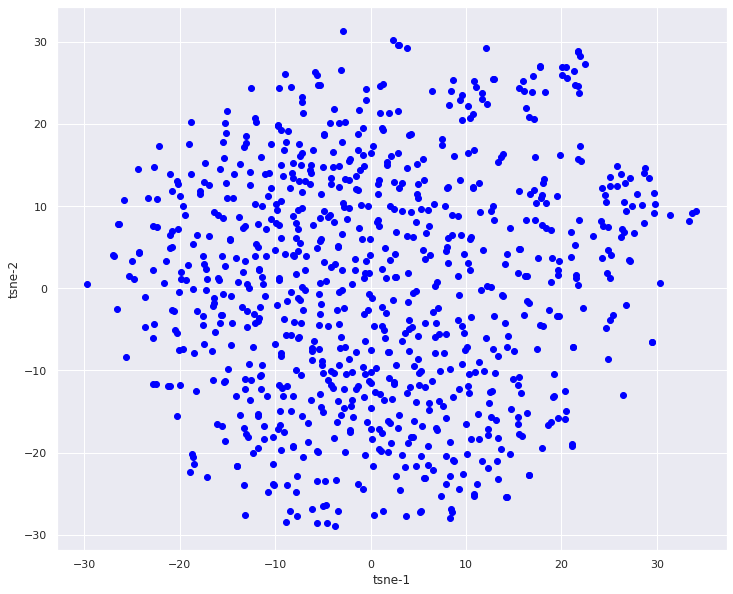

In [31]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = embedded_cleaned_data[:,0]
y = embedded_cleaned_data[:,1]
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")

scatter = ax.scatter(x,y, c="blue")
plt.show()

### 3.2. PCA visualization

In [32]:
pca = PCA(n_components=2, random_state=1234)
embedded_cleaned_data = pca.fit_transform(scaled_cleaned_all_data)
expl_var_ratio = pca.explained_variance_ratio_

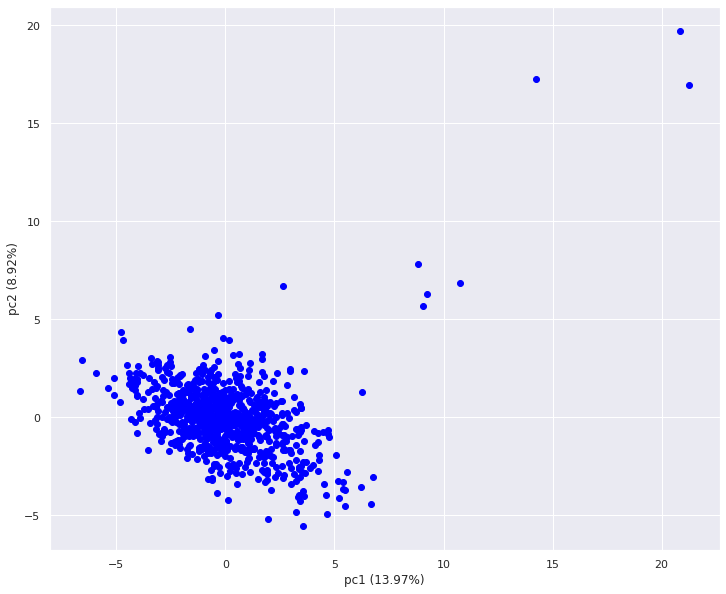

In [34]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = embedded_cleaned_data[:,0]
y = embedded_cleaned_data[:,1]
ax.set_xlabel("pc1 ({}%)".format(np.round(expl_var_ratio[0]*100,2)))
ax.set_ylabel("pc2 ({}%)".format(np.round(expl_var_ratio[1]*100,2)))

scatter = ax.scatter(x,y, c="blue")
plt.show()

---

## 4. Heterogeneity in the population

We will now assess how dissimilar the treatment and the control condition samples are.

### 4.1. Cluster analysis

We perform a Gaussian mixture modelling cluster analysis.

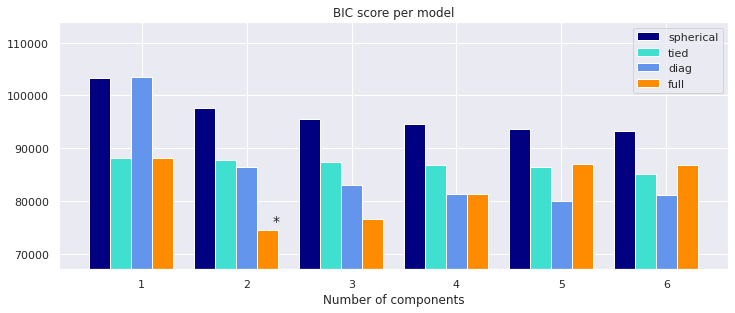

In [47]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(scaled_cleaned_all_data)
        bic.append(gmm.bic(scaled_cleaned_all_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(12, 10))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 0.9, bic.max()*1.1])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [44]:
print(f'Selected GMM: {best_gmm.covariance_type} model, '
          f'{best_gmm.n_components} components')

Selected GMM: full model, 2 components


We see that the GMM model with lowest BIC for the data takes two components and a full covariance structures.

### 4.2. Special features of interest

We now plot the distribution for specific pre-selected features of special interest.